In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Final_Data.csv')

print("Dataset Loaded Successfully!")
display(df.head())
display(df.info())

Dataset Loaded Successfully!


,city,year,min_mag,max_mag,frequency,population
0,abra de ilog,2020,1.4,4.8,121,32596
1,abra de ilog,2021,1.5,5.8,92,32801
2,abra de ilog,2022,1.5,5.3,109,32986
3,abra de ilog,2023,1.3,5.1,125,33151
4,abra de ilog,2024,1.4,4.9,134,33297


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        4332 non-null   object 
 1   year        4332 non-null   int64  
 2   min_mag     4332 non-null   float64
 3   max_mag     4332 non-null   float64
 4   frequency   4332 non-null   int64  
 5   population  4332 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 203.2+ KB


None

In [37]:
corr = df.corr(numeric_only=True)

print("\n=== Correlation Matrix ===")
display(corr)



=== Correlation Matrix ===


,year,min_mag,max_mag,frequency,population
year,1.000000,-0.218679,-0.062580,0.008491,-0.026187
min_mag,-0.218679,1.000000,-0.067145,-0.166690,0.016960
max_mag,-0.062580,-0.067145,1.000000,0.346481,-0.065089
frequency,0.008491,-0.166690,0.346481,1.000000,-0.026795
population,-0.026187,0.016960,-0.065089,-0.026795,1.000000


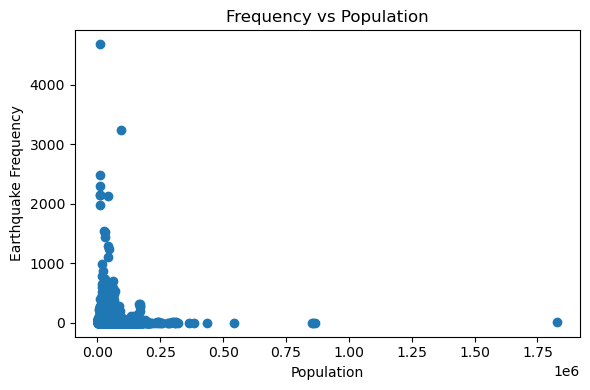

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(df['population'], df['frequency'])
plt.xlabel("Population")
plt.ylabel("Earthquake Frequency")
plt.title("Frequency vs Population")
plt.tight_layout()
plt.show()


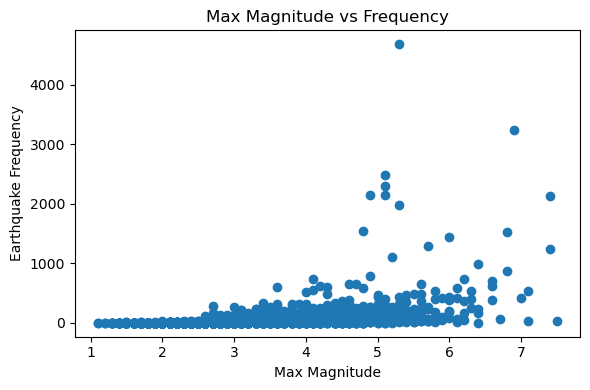

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(df['max_mag'], df['frequency'])
plt.xlabel("Max Magnitude")
plt.ylabel("Earthquake Frequency")
plt.title("Max Magnitude vs Frequency")
plt.tight_layout()
plt.show()

In [43]:
city_group = df.groupby(['city', 'year'])['frequency'].sum().unstack()

print("\n=== Earthquake Frequency Trend Per City ===")
display(city_group.head())


=== Earthquake Frequency Trend Per City ===


year,2020,2021,2022,2023,2024,2025
city,,,,,,
abra de ilog,121.0,92.0,109.0,125.0,134.0,179.0
abucay,NaN,1.0,NaN,1.0,NaN,NaN
abulug,3.0,NaN,NaN,1.0,2.0,3.0
abuyog,12.0,12.0,9.0,4.0,181.0,21.0
adams,25.0,11.0,45.0,55.0,53.0,52.0


In [45]:
ranking = df.groupby('city')['frequency'].sum().sort_values(ascending=False)

print("\n=== Top 10 Most Active Earthquake Cities ===")
display(ranking.head(10))


=== Top 10 Most Active Earthquake Cities ===


city
burgos               15714
san isidro            4338
hinatuan              4252
general luna          4224
city of bogo          3242
calatagan             3085
cortes                3050
governor generoso     2496
lingig                2451
pilar                 2240
Name: frequency, dtype: int64

In [47]:
import pandas as pd

# Load datasets
df_eq = pd.read_csv('Final_Data.csv')
df_reg = pd.read_excel('phl_population-projections_admin3_midyear2020_2025.xlsx')

# Standardize city names to ensure matching
df_eq['city_clean'] = df_eq['city'].str.lower().str.strip()
df_reg['city_clean'] = df_reg['Municipality_City'].str.lower().str.strip()

# Merge
merged = df_eq.merge(
    df_reg[['Region','Province','Municipality_City','city_clean']],
    on='city_clean',
    how='left'
)

# Show sample results
merged.head()

,city,year,min_mag,max_mag,frequency,population,city_clean,Region,Province,Municipality_City
0,abra de ilog,2020,1.4,4.8,121,32596,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog
1,abra de ilog,2021,1.5,5.8,92,32801,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog
2,abra de ilog,2022,1.5,5.3,109,32986,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog
3,abra de ilog,2023,1.3,5.1,125,33151,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog
4,abra de ilog,2024,1.4,4.9,134,33297,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog


In [49]:
merged_sorted = merged.sort_values(
    by=["Region", "Province", "Municipality_City"],
    ascending=[True, True, True]
)


In [51]:
merged_sorted.head()

,city,year,min_mag,max_mag,frequency,population,city_clean,Region,Province,Municipality_City
63,akbar,2022,2.5,2.5,1,22009,akbar,Autonomous Region in Muslim Mindanao (ARMM),Basilan,Akbar
64,akbar,2023,1.8,1.8,1,22731,akbar,Autonomous Region in Muslim Mindanao (ARMM),Basilan,Akbar
65,akbar,2024,1.6,1.7,2,23473,akbar,Autonomous Region in Muslim Mindanao (ARMM),Basilan,Akbar
66,al-barka,2023,2.9,2.9,1,22276,al-barka,Autonomous Region in Muslim Mindanao (ARMM),Basilan,Al-Barka
67,al-barka,2024,2.4,2.4,1,22442,al-barka,Autonomous Region in Muslim Mindanao (ARMM),Basilan,Al-Barka


In [53]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()


merged['frequency_norm'] = scaler.fit_transform(merged[['frequency']])
merged['population_norm'] = scaler.fit_transform(merged[['population']])


In [55]:
merged.head()

,city,year,min_mag,max_mag,frequency,population,city_clean,Region,Province,Municipality_City,frequency_norm,population_norm
0,abra de ilog,2020,1.4,4.8,121,32596,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog,0.025647,0.017109
1,abra de ilog,2021,1.5,5.8,92,32801,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog,0.019449,0.017221
2,abra de ilog,2022,1.5,5.3,109,32986,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog,0.023082,0.017323
3,abra de ilog,2023,1.3,5.1,125,33151,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog,0.026501,0.017413
4,abra de ilog,2024,1.4,4.9,134,33297,abra de ilog,Region IV-B (MIMAROPA),Occidental Mindoro,Abra De Ilog,0.028425,0.017493


In [23]:
corr_norm = merged['frequency_norm'].corr(merged['population_norm'])
print("Correlation after normalization:", corr_norm)


Correlation after normalization: -0.052725145662342654


In [57]:
corr_raw = merged['frequency'].corr(merged['population'])
print("Correlation between frequency and population (raw values):", corr_raw)

Correlation between frequency and population (raw values): -0.05272514566234259


In [59]:
import pandas as pd

df = pd.read_excel("Prepared_Earthquake_Data.xlsx")

# Detect normalized vs real magnitude
if df['Magnitude'].max() <= 1.5:
    print("Detected: Normalized magnitudes (0–1).")
    mag_col = "Magnitude"
else:
    print("Detected: Real magnitudes.")
    mag_col = "Magnitude_real"

def categorize(mag):
    if mag < 0.1:
        return "Micro"
    elif mag < 0.2:
        return "Very Minor"
    elif mag < 0.3:
        return "Minor"
    elif mag < 0.4:
        return "Light"
    elif mag < 0.5:
        return "Moderate"
    elif mag < 0.6:
        return "Strong"
    elif mag < 0.7:
        return "Major"
    else:
        return "Great"

df['Intensity_Category'] = df[mag_col].apply(categorize)

df.head()


Detected: Normalized magnitudes (0–1).


,Region,Province,City,Date,Latitude,Longitude,Magnitude,Depth_In_Km,Abs_Latitude,Abs_Longitude,Magnitude_Depth_Interaction,Intensity_Category
0,Region I (Ilocos Region),Ilocos Norte,adams,2025-11-05,18.50,120.93,0.169231,0.049563,18.50,120.93,71.4,Very Minor
1,Region I (Ilocos Region),Ilocos Norte,adams,2025-10-31,18.45,120.90,0.153846,0.001458,18.45,120.90,2.0,Very Minor
2,Region I (Ilocos Region),Ilocos Norte,adams,2025-10-28,18.45,120.98,0.215385,0.011662,18.45,120.98,19.2,Minor
3,Region I (Ilocos Region),Ilocos Norte,adams,2025-10-28,18.48,120.97,0.215385,0.013120,18.48,120.97,21.6,Minor
4,Region I (Ilocos Region),Ilocos Norte,adams,2025-10-27,18.44,120.84,0.153846,0.016035,18.44,120.84,22.0,Very Minor


In [29]:
filtered = df[df['Intensity_Category'].isin(['Strong', 'Major', 'Great'])]
filtered.head()


,Region,Province,City,Date,Latitude,Longitude,Magnitude,Depth_In_Km,Abs_Latitude,Abs_Longitude,Magnitude_Depth_Interaction,Intensity_Category
68,Region I (Ilocos Region),Ilocos Norte,adams,2024-10-10,18.35,120.80,0.507692,0.002915,18.35,120.80,8.6,Strong
102,Region I (Ilocos Region),Ilocos Norte,adams,2024-01-26,18.36,120.85,0.600000,0.018950,18.36,120.85,63.7,Major
329,Region I (Ilocos Region),Ilocos Norte,bangui,2025-01-31,18.56,120.66,0.507692,0.026239,18.56,120.66,77.4,Strong
337,Region I (Ilocos Region),Ilocos Norte,bangui,2024-12-30,18.60,120.63,0.707692,0.033528,18.60,120.63,128.8,Great
349,Region I (Ilocos Region),Ilocos Norte,bangui,2024-12-04,18.52,120.73,0.723077,0.033528,18.52,120.73,131.1,Great


In [60]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year


In [63]:
intensity_year = df[df['Intensity_Category'].isin(['Strong','Major','Great'])] \
    .groupby(['Year','Intensity_Category']) \
    .size() \
    .reset_index(name='Count')

intensity_year


,Year,Intensity_Category,Count
0,2020,Great,18
1,2020,Major,84
2,2020,Strong,239
3,2021,Great,18
4,2021,Major,138
5,2021,Strong,255
6,2022,Great,17
7,2022,Major,99
8,2022,Strong,243
9,2023,Great,26


In [ ]:
region_year_intensity = df[df['Intensity_Category'].isin(['Strong','Major','Great'])] \
    .groupby(['Region','Year']) \
    .size() \
    .reset_index(name='StrongMajorGreat_Count')

region_year_intensity.head()


In [65]:
pop = pd.read_excel('phl_population-projections_admin3_midyear2020_2025.xlsx')

# Convert to long format (2020 → 2025 columns into one)
pop_melt = pop.melt(
    id_vars=['Region','Province','Municipality_City'],
    value_vars=['July2020','July2021','July2022','July2023','July2024','July2025'],
    var_name='Year',
    value_name='Population'
)

# Clean year
pop_melt['Year'] = pop_melt['Year'].str.replace('July','').astype(int)


In [67]:
region_population = pop_melt.groupby(['Region','Year'])['Population'].sum().reset_index()


In [69]:
merged_region = pd.merge(
    region_year_intensity,
    region_population,
    on=['Region','Year'],
    how='left'
)

merged_region.head()


NameError: name 'region_year_intensity' is not defined

In [71]:
corr = merged_region['StrongMajorGreat_Count'].corr(merged_region['Population'])
corr

SyntaxError: invalid syntax (2615173372.py, line 2)